Total 1 human(s) detected and saved as separate images.


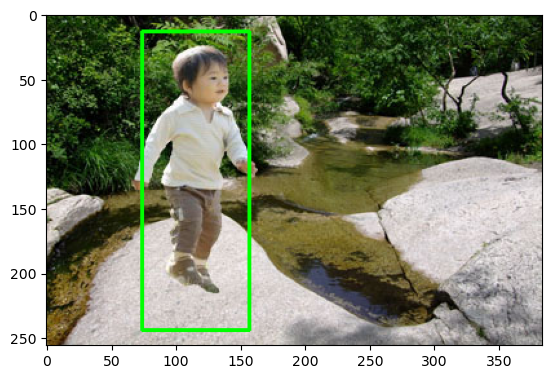

In [4]:
import cv2
import os
from matplotlib import pyplot as plt

# Load the pre-trained human detection model
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load the input image
input_image_path = 'Tp_D_CRN_M_N_sec00015_cha00086_11400.jpg'#
input_image_path ='Tp_D_CRN_S_N_nat00033_cha00086_11502.jpg'#
input_image_path='Tp_D_CRN_M_N_nat10129_cha00086_11522.jpg'
image = cv2.imread(input_image_path)

# Create a directory to save the cropped images
output_dir = input_image_path[:-4]
os.makedirs(output_dir, exist_ok=True)

#image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect humans in the image
human_rectangles, _ = hog.detectMultiScale(image,winStride=(2, 2), padding=(10, 10))#, scale=1.02)

# Iterate through the detected human rectangles and crop & save the images
for i, (x, y, w, h) in enumerate(human_rectangles):
    # Crop the image around the detected human
    cropped_image = image[y:y+h, x:x+w]
    
    # Define the output file path
    output_image_path = os.path.join(output_dir, f'cropped_human_{i}.jpg')

    # Save the cropped image as a separate JPG file
    cv2.imwrite(output_image_path, cropped_image)

# Display the number of cropped images
print(f"Total {len(human_rectangles)} human(s) detected and saved as separate images.")

# Close any open windows
cv2.destroyAllWindows()


for (x, y, w, h) in human_rectangles:
   pad_w, pad_h = int(0.15 * w), int(0.01 * h)
   cv2.rectangle(image, (x + pad_w, y + pad_h), (x + w - pad_w, y + h - pad_h), (0, 255, 0), 2)

plt.imshow(image[:,:,::-1])
plt.show()


